In [58]:
# ----------- LIBRARY ---------------
"""
Library yang digunakan dalam kode ini adalah :
- pandas
- openpyxl

"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [59]:
# CLEANING UMUR > 100

In [60]:
df = pd.read_excel(r"Data\13222114.xlsx")
ukuran = df.shape
print(f"DataFrame memiliki {ukuran[0]} baris dan {ukuran[1]} kolom.")

DataFrame memiliki 282 baris dan 150 kolom.


In [61]:
df.drop(df[df['Usia'] > 100].index, inplace=True)
ukuran = df.shape
print(f"DataFrame setelah cleansing umur memiliki {ukuran[0]} baris dan {ukuran[1]} kolom.")

DataFrame setelah cleansing umur memiliki 279 baris dan 150 kolom.


In [62]:
# NOMER 1

ukuran = df.shape
print("1.a Berapa dimensi dataset?")
print(f"DataFrame memiliki {ukuran[0]} baris dan {ukuran[1]} kolom.")


1.a Berapa dimensi dataset?
DataFrame memiliki 279 baris dan 150 kolom.


In [63]:
print("1.b Jumlah missing value per kolom?")
for col in df.columns:
    missing = df[col].isnull().sum()
    print(f"Jumlah missing value pada kolom '{col}': {missing}")

1.b Jumlah missing value per kolom?
Jumlah missing value pada kolom 'Jenis Kelamin': 0
Jumlah missing value pada kolom 'Usia': 0
Jumlah missing value pada kolom 'Pendidikan Terakhir': 0
Jumlah missing value pada kolom 'Pekerjaan': 0
Jumlah missing value pada kolom 'Penghasilan per Bulan': 0
Jumlah missing value pada kolom 'Domisili': 0
Jumlah missing value pada kolom 'Durasi Penggunaan Internet per Hari (dalam Jam)': 84
Jumlah missing value pada kolom 'Aktivitas Online Meningkat': 0
Jumlah missing value pada kolom 'Aktivitas yang Meningkat dalam 3 Bulan Terakhir': 95
Jumlah missing value pada kolom 'layanan_aktif_1': 43
Jumlah missing value pada kolom 'layanan_aktif_2': 133
Jumlah missing value pada kolom 'layanan_aktif_3': 256
Jumlah missing value pada kolom 'layanan_aktif_4': 224
Jumlah missing value pada kolom 'layanan_aktif_5': 264
Jumlah missing value pada kolom 'layanan_aktif_6': 268
Jumlah missing value pada kolom 'bank_1': 214
Jumlah missing value pada kolom 'bank_2': 212
Jumla

In [64]:
for col in df.columns:
    missing = df[col].isnull().sum()
    print(f"Jumlah missing value pada kolom '{col}': {missing}")


Jumlah missing value pada kolom 'Jenis Kelamin': 0
Jumlah missing value pada kolom 'Usia': 0
Jumlah missing value pada kolom 'Pendidikan Terakhir': 0
Jumlah missing value pada kolom 'Pekerjaan': 0
Jumlah missing value pada kolom 'Penghasilan per Bulan': 0
Jumlah missing value pada kolom 'Domisili': 0
Jumlah missing value pada kolom 'Durasi Penggunaan Internet per Hari (dalam Jam)': 84
Jumlah missing value pada kolom 'Aktivitas Online Meningkat': 0
Jumlah missing value pada kolom 'Aktivitas yang Meningkat dalam 3 Bulan Terakhir': 95
Jumlah missing value pada kolom 'layanan_aktif_1': 43
Jumlah missing value pada kolom 'layanan_aktif_2': 133
Jumlah missing value pada kolom 'layanan_aktif_3': 256
Jumlah missing value pada kolom 'layanan_aktif_4': 224
Jumlah missing value pada kolom 'layanan_aktif_5': 264
Jumlah missing value pada kolom 'layanan_aktif_6': 268
Jumlah missing value pada kolom 'bank_1': 214
Jumlah missing value pada kolom 'bank_2': 212
Jumlah missing value pada kolom 'bank_3':

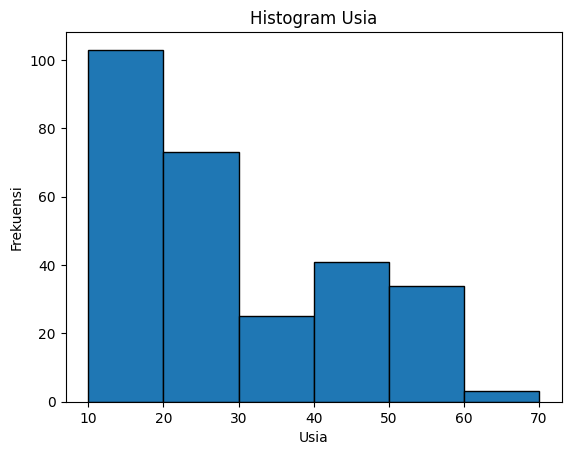

In [65]:
usia = df['Usia']

# Membuat rentang usia
bins = np.arange(10, usia.max() + 10, 10)

# Membuat histogram
plt.hist(usia, bins=bins, edgecolor='black')

plt.title('Histogram Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')

plt.show()

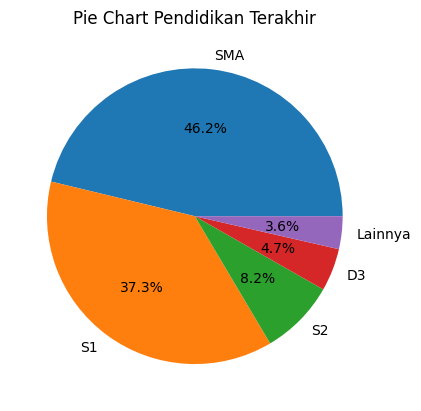

Nilai yang terkandung dalam 'Lainnya':
S3
SMP
D4


In [66]:
# Menghitung jumlah setiap nilai unik dan konversi ke persentase
counts = df['Pendidikan Terakhir'].value_counts(normalize=True) * 100

# Menyimpan nilai dengan presentase kurang dari 4% dalam variabel lain
nilai_lainnya = counts[counts < 4]

# Menggabungkan nilai dengan presentase kurang dari 4%
counts = counts[counts >= 4]
counts['Lainnya'] = nilai_lainnya.sum()

# Membuat pie chart
counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Pie Chart Pendidikan Terakhir')
plt.ylabel('')  # Menghapus label sumbu y

plt.show()

# Mencetak nilai yang terkandung dalam 'Lainnya'
print("Nilai yang terkandung dalam 'Lainnya':")
for nilai in nilai_lainnya.index:
    print(nilai)


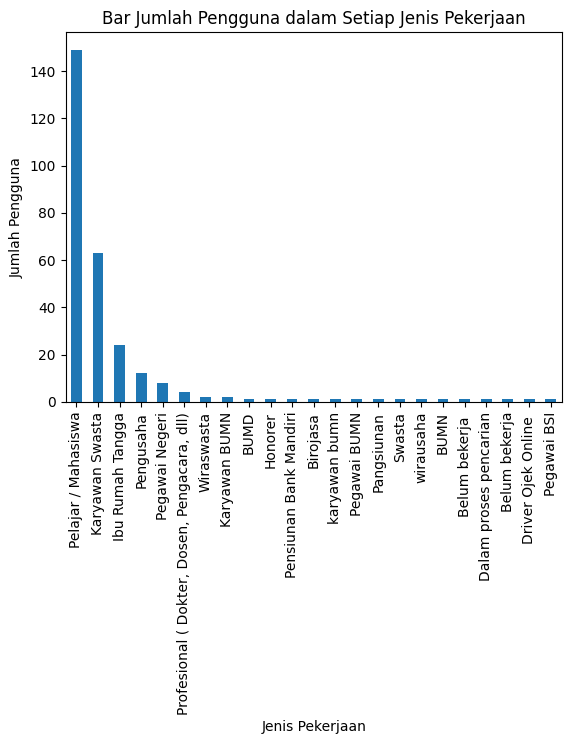

In [67]:
# Misalkan 'df' adalah DataFrame Anda dan 'Pekerjaan' adalah kolom yang berisi data pekerjaan
pekerjaan = df['Pekerjaan']

# Menghitung jumlah setiap jenis pekerjaan
counts = pekerjaan.value_counts()

# Membuat bar chart
counts.plot(kind='bar')

plt.title('Bar Jumlah Pengguna dalam Setiap Jenis Pekerjaan')
plt.xlabel('Jenis Pekerjaan')
plt.ylabel('Jumlah Pengguna')

plt.show()

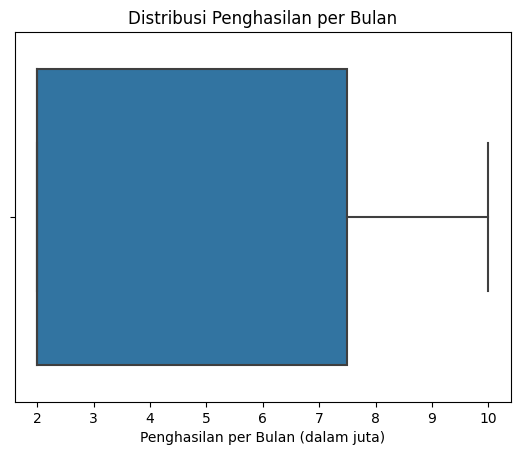

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengganti simbol mata uang dan spasi
df['Penghasilan per Bulan'] = df['Penghasilan per Bulan'].str.replace('Rp ', '').str.replace(' juta', '')

# Mengubah rentang penghasilan menjadi rata-rata
def rata_rata(rentang):
    if rentang.startswith('<'):
        return float(rentang.replace('< ', ''))
    elif rentang.startswith('>'):
        return float(rentang.replace('> ', ''))
    else:
        batas_bawah, batas_atas = rentang.split(' – ')
        return (float(batas_bawah) + float(batas_atas)) / 2

df['Penghasilan per Bulan'] = df['Penghasilan per Bulan'].apply(rata_rata)

# Membuat box plot
sns.boxplot(x=df['Penghasilan per Bulan'], orient='h')

plt.title('Distribusi Penghasilan per Bulan')
plt.xlabel('Penghasilan per Bulan (dalam juta)')

plt.show()
